## Exploring Spotify music taste profiles using Machine Learning

In [1]:
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from sklearn.preprocessing import StandardScaler
from math import pi
pd.set_option('display.float_format', lambda x: '{:.3f}'.format(x)) #Limiting floats output to 3 decimal points


In [2]:
#Load songdata

#top_annual_df = pd.read_csv("./top_tracks_final.csv")
top_tracks_USA = pd.read_csv("./top_USA_final.csv")
songs_j_loves = pd.read_csv("./songs_j_loves_final.csv")
songs_b_loves = pd.read_csv("./songs_b_loves_final.csv")
songs_k_loves = pd.read_csv("./spotify_kaki_favs_merged.csv")

In [3]:
songs_j_loves.columns

Index(['name', 'id', 'popularity', 'duration', 'danceability', 'energy', 'key',
       'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness',
       'liveness', 'valence', 'tempo', 'album', 'artist', 'release_date',
       'release_year'],
      dtype='object')

In [4]:
songs_b_loves.columns

Index(['track_name', 'id', 'popularity', 'duration', 'danceability', 'energy',
       'key', 'loudness', 'mode', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'index_col',
       'album', 'artist', 'release_date', 'release_year'],
      dtype='object')

In [5]:
songs_k_loves.columns

Index(['artist', 'album', 'name', 'id', 'popularity', 'duration',
       'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'index_col', 'release_date', 'release_year'],
      dtype='object')

In [6]:
# rename columns so that they match across dataframes
songs_b_loves.rename(columns = {"track_name":"name", "track_id":"id"}, inplace = True)

# drop index column
songs_k_loves = songs_k_loves.drop(columns=["index_col"])
songs_b_loves = songs_b_loves.drop(columns = ["index_col"])

In [7]:
# reorder column names
columns= ['id', 'name', 'artist', 'popularity', 'duration', 'danceability', 
          'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 
          'instrumentalness', 'liveness', 'valence', 'tempo', 'release_date', 'release_year','album']

songs_k_loves = songs_k_loves.reindex(columns, axis = "columns")
songs_b_loves = songs_b_loves.reindex(columns, axis = "columns")
songs_j_loves = songs_j_loves.reindex(columns, axis = "columns")



In [8]:
# store df column names in 3 lists so that we can compare their values
column_names_b = songs_b_loves.columns.values.tolist()
column_names_j = songs_j_loves.columns.values.tolist()
column_names_k = songs_k_loves.columns.values.tolist()

In [9]:
print(column_names_b)

['id', 'name', 'artist', 'popularity', 'duration', 'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'release_date', 'release_year', 'album']


In [10]:
print(column_names_k)

['id', 'name', 'artist', 'popularity', 'duration', 'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'release_date', 'release_year', 'album']


In [11]:
#confirm column names in both dataframes are identical
column_names_b == column_names_k == column_names_j

True

/Users/jeremyosir/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/jeremyosir/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/jeremyosir/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function w

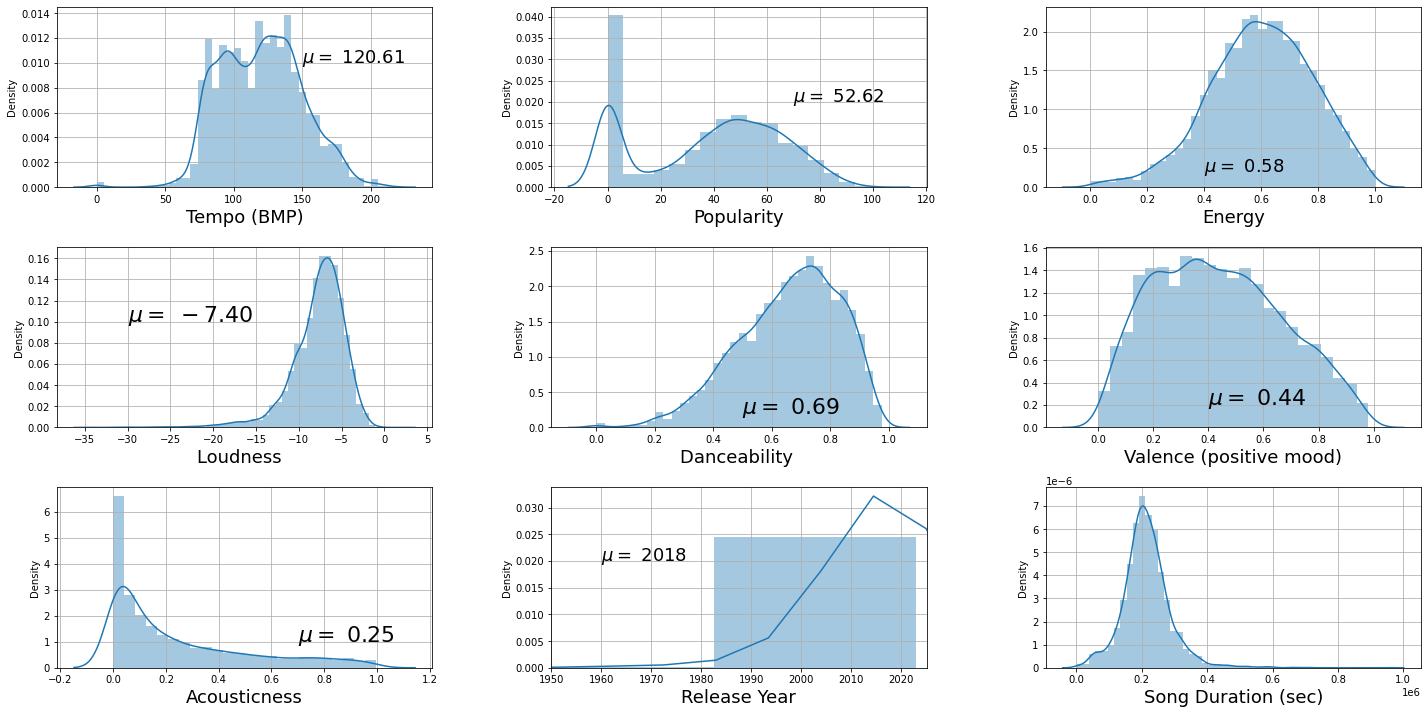

In [12]:
# Visualize distributions of liked tracks
plt.figure(1, figsize=(20, 10),)
# Adjust the subplot layout parameters
plt.subplots_adjust(hspace=0.5, wspace=1.0)

plt.subplot(331)
sns.distplot(songs_j_loves.tempo);
plt.text(150, .010, r'$\mu=\ 120.61$', fontsize=18)
plt.xlabel('Tempo (BMP)', fontsize=18)
plt.grid(True)

plt.subplot(332)
sns.distplot(songs_j_loves.popularity);
plt.text(70, .020, r'$\mu=\ 52.62$', fontsize=18)
plt.xlabel('Popularity', fontsize=18)
plt.grid(True)

plt.subplot(333)
sns.distplot(songs_j_loves.energy);
plt.text(0.4, .2, r'$\mu=\ 0.58$', fontsize=18)
plt.xlabel('Energy', fontsize=18)
plt.grid(True)

plt.subplot(334)
sns.distplot(songs_j_loves.loudness);
plt.text(-30, 0.10, r'$\mu=\ -7.40$', fontsize=22)
plt.xlabel('Loudness  ', fontsize=18)
plt.grid(True)

plt.subplot(335)
sns.distplot(songs_j_loves.danceability);
plt.text(0.5, 0.2, r'$\mu=\ 0.69$', fontsize=22)
plt.xlabel('Danceability ', fontsize=18)
plt.grid(True)

plt.subplot(336)
sns.distplot(songs_j_loves.valence);
plt.text(0.4, 0.2, r'$\mu=\ 0.44$', fontsize=22)
plt.xlabel('Valence (positive mood)', fontsize=18)
plt.grid(True)

plt.subplot(337)
sns.distplot(songs_j_loves.acousticness);
plt.text(0.7, 1.0, r'$\mu=\ 0.25$', fontsize=22)
plt.xlabel('Acousticness', fontsize=18)
plt.grid(True)

plt.subplot(338)
sns.distplot(songs_j_loves.release_year);
plt.text(1960, 0.02, r'$\mu=\ 2018$', fontsize=18)
plt.xlim(1950, 2025)
plt.xlabel('Release Year', fontsize=18)
plt.grid(True)


plt.subplot(339)
sns.distplot(songs_j_loves.duration);
# plt.text(0.01, 0.02, r'$\mu=\ 212.80$', fontsize=8)
plt.xlabel('Song Duration (sec)', fontsize=18)
plt.grid(True)

plt.tight_layout(pad=1.0, w_pad=5.0, h_pad=1.0)

#### Comparing the average feature values for 3 individuals favorite songs 

/Users/jeremyosir/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/jeremyosir/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/jeremyosir/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function w

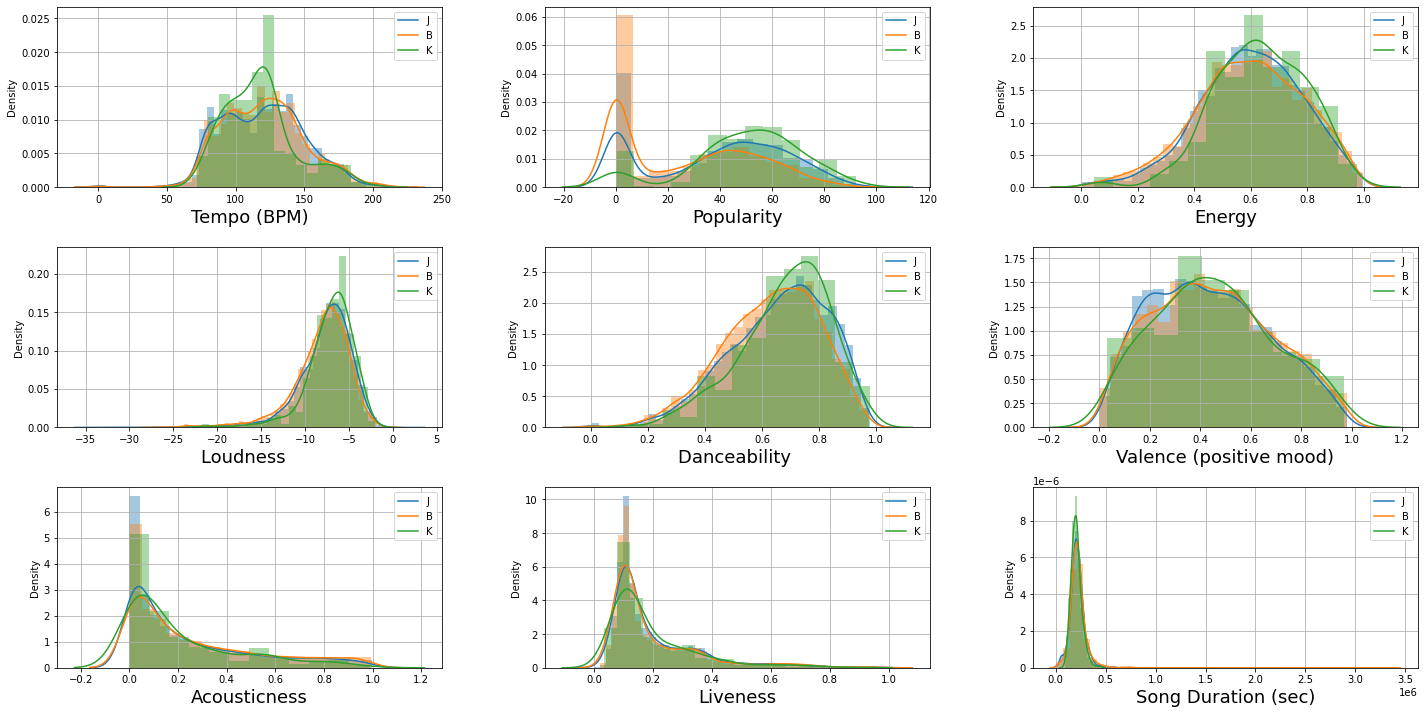

In [38]:
# Visualize distributions of liked tracks
plt.figure(1, figsize=(20, 10),)
# Adjust the subplot layout parameters
plt.subplots_adjust(hspace=0.5, wspace=1.0)

plt.subplot(331)
sns.distplot(songs_j_loves.tempo);
sns.distplot(songs_b_loves.tempo);
sns.distplot(songs_k_loves.tempo);
plt.xlabel('Tempo (BPM)', fontsize=18);
plt.legend(labels = ["J", "B", "K"]);
plt.grid(True)

plt.subplot(332)
sns.distplot(songs_j_loves.popularity);
sns.distplot(songs_b_loves.popularity);
sns.distplot(songs_k_loves.popularity);
plt.xlabel('Popularity', fontsize=18)
plt.legend(labels = ["J", "B", "K"]);
plt.grid(True)

plt.subplot(333)
sns.distplot(songs_j_loves.energy);
sns.distplot(songs_b_loves.energy);
sns.distplot(songs_k_loves.energy);
plt.xlabel('Energy', fontsize=18);
plt.legend(labels = ["J", "B", "K"]);
plt.grid(True)

plt.subplot(334)
sns.distplot(songs_j_loves.loudness);
sns.distplot(songs_b_loves.loudness);
sns.distplot(songs_k_loves.loudness);
plt.xlabel('Loudness  ', fontsize=18);
plt.legend(labels = ["J", "B", "K"]);
plt.grid(True)

plt.subplot(335)
sns.distplot(songs_j_loves.danceability);
sns.distplot(songs_b_loves.danceability);
sns.distplot(songs_k_loves.danceability);
plt.xlabel('Danceability ', fontsize=18);
plt.legend(labels = ["J", "B", "K"]);
plt.grid(True)

plt.subplot(336)
sns.distplot(songs_j_loves.valence);
sns.distplot(songs_b_loves.valence);
sns.distplot(songs_k_loves.valence);
plt.xlabel('Valence (positive mood)', fontsize=18);
plt.legend(labels = ["J", "B", "K"]);
plt.grid(True)

plt.subplot(337)
sns.distplot(songs_j_loves.acousticness);
sns.distplot(songs_b_loves.acousticness);
sns.distplot(songs_k_loves.acousticness);
plt.xlabel('Acousticness', fontsize=18);
plt.legend(labels = ["J", "B", "K"]);
plt.grid(True)

plt.subplot(338)
sns.distplot(songs_j_loves.liveness);
sns.distplot(songs_b_loves.liveness);
sns.distplot(songs_k_loves.liveness);
# plt.xlim(0, 0.02)
plt.xlabel('Liveness', fontsize=18);
plt.legend(labels = ["J", "B", "K"]);
plt.grid(True)


plt.subplot(339)
sns.distplot(songs_j_loves.duration);
sns.distplot(songs_b_loves.duration);
sns.distplot(songs_k_loves.duration);
# plt.text(0.01, 0.02, r'$\mu=\ 212.80$', fontsize=8)
plt.xlabel('Song Duration (sec)', fontsize=18);
plt.legend(labels = ["J", "B", "K"]);
plt.grid(True)
plt.savefig("./eda_chart_BvJvK", dpi = 200)

plt.tight_layout(pad=1.0, w_pad=5.0, h_pad=1.0)

#### Comparing my Top Tracks with the Top USA Tracks

/Users/jeremyosir/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/jeremyosir/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/jeremyosir/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function w

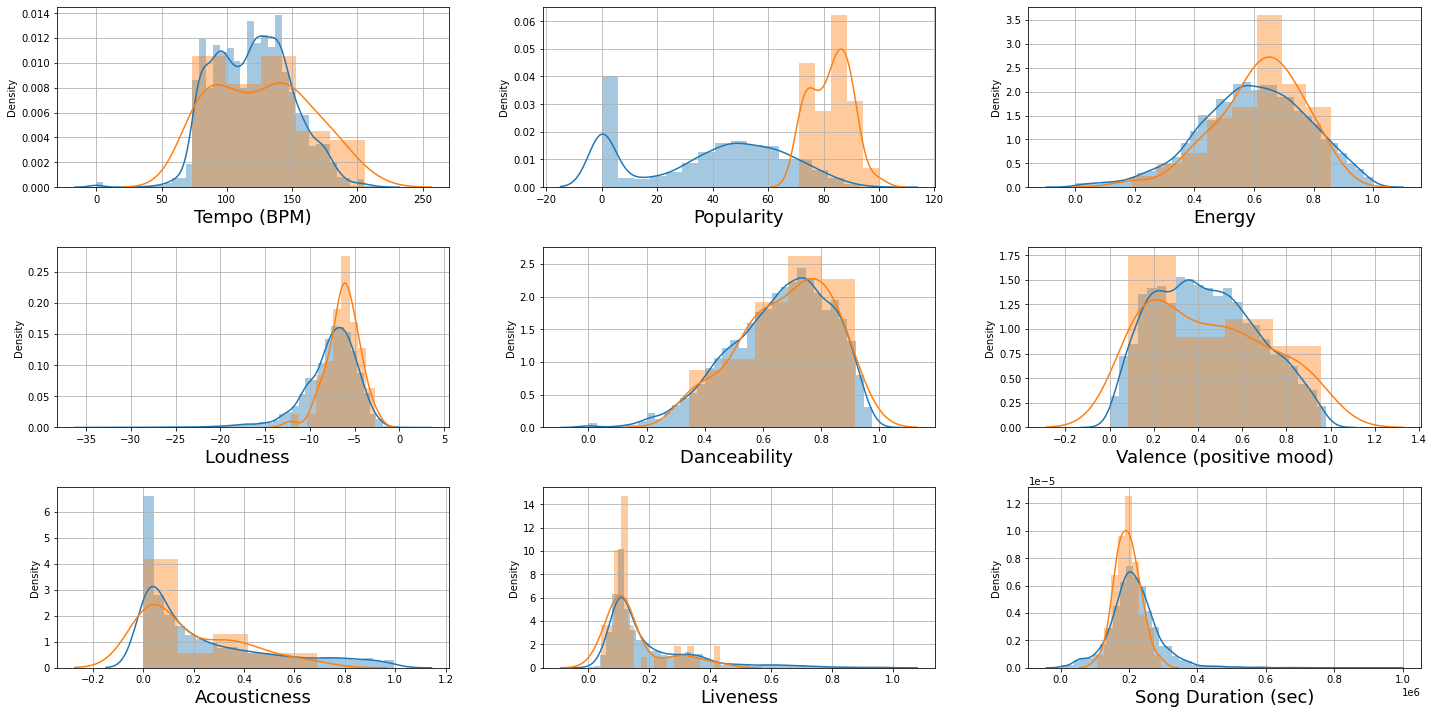

In [14]:
# Visualize distributions of liked tracks
plt.figure(1, figsize=(20, 10),)
# Adjust the subplot layout parameters
plt.subplots_adjust(hspace=0.5, wspace=1.0)

plt.subplot(331)
sns.distplot(songs_j_loves.tempo);
sns.distplot(top_tracks_USA.tempo);
plt.xlabel('Tempo (BPM)', fontsize=18)
plt.grid(True)

plt.subplot(332)
sns.distplot(songs_j_loves.popularity);
sns.distplot(top_tracks_USA.popularity);
plt.xlabel('Popularity', fontsize=18)
plt.grid(True)

plt.subplot(333)
sns.distplot(songs_j_loves.energy);
sns.distplot(top_tracks_USA.energy);
plt.xlabel('Energy', fontsize=18)
plt.grid(True)

plt.subplot(334)
sns.distplot(songs_j_loves.loudness);
sns.distplot(top_tracks_USA.loudness);
plt.xlabel('Loudness  ', fontsize=18)
plt.grid(True)

plt.subplot(335)
sns.distplot(songs_j_loves.danceability);
sns.distplot(top_tracks_USA.danceability);
plt.xlabel('Danceability ', fontsize=18)
plt.grid(True)

plt.subplot(336)
sns.distplot(songs_j_loves.valence);
sns.distplot(top_tracks_USA.valence);
plt.xlabel('Valence (positive mood)', fontsize=18)
plt.grid(True)

plt.subplot(337)
sns.distplot(songs_j_loves.acousticness);
sns.distplot(top_tracks_USA.acousticness);
plt.xlabel('Acousticness', fontsize=18)
plt.grid(True)

plt.subplot(338)
sns.distplot(songs_j_loves.liveness);
sns.distplot(top_tracks_USA.liveness);
# plt.xlim(0, 0.02)
plt.xlabel('Liveness', fontsize=18)
plt.grid(True)


plt.subplot(339)
sns.distplot(songs_j_loves.duration);
sns.distplot(top_tracks_USA.duration);
# plt.text(0.01, 0.02, r'$\mu=\ 212.80$', fontsize=8)
plt.xlabel('Song Duration (sec)', fontsize=18)
plt.grid(True)

plt.tight_layout(pad=1.0, w_pad=5.0, h_pad=1.0)

### Radar chart to compare features

#####  Create a radar chart showing music preferences
Steps:
1. Create a df that contains the features we want to visualize
2. Scale the feature values to facilitate easier visual comparison
3. Create a Series object that contains the mean values of each feature (this is what we will visualize)
4. Create a parameter object that includes the names of the features we want to visualize
5. Create a range object that captures the min and max values for each feature (multiply by 25% for buffer)

In [15]:
# Create a new dataframe that only contains the columns we are interested in visualizing

df_j = songs_j_loves.drop(columns= ['release_year', 'duration', 'mode', 'key', 
                                    'release_date', 'id', 'album', 'artist', 'name'])
print(df_j.columns)

df_b = songs_b_loves.drop(columns= ['release_year', 'duration', 'mode', 'key', 
                                    'release_date', 'id', 'album', 'artist', 'name'])
print(df_b.columns)

df_k = songs_k_loves.drop(columns= ['release_year', 'duration', 'mode', 'key', 
                                    'release_date', 'id', 'album', 'artist', 'name'])
print(df_k.columns)


Index(['popularity', 'danceability', 'energy', 'loudness', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo'],
      dtype='object')
Index(['popularity', 'danceability', 'energy', 'loudness', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo'],
      dtype='object')
Index(['popularity', 'danceability', 'energy', 'loudness', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo'],
      dtype='object')


In [16]:
# For interpretability, scale the feature values using MinMax Scaler (min = 0, max = 1)

#create df for each of our fav songs that we will scale
df_j_scaled = df_j
df_b_scaled  = df_b
df_k_scaled = df_k


scaler = MinMaxScaler()

# transform numerical features that we will use in our models -- focus on just musical attributes
df_j_scaled[['popularity','danceability', 'energy','loudness', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']] = scaler.fit_transform(df_j_scaled[['popularity', 'danceability', 'energy','loudness', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']])

df_b_scaled[['popularity','danceability', 'energy','loudness', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']] = scaler.fit_transform(df_b_scaled[['popularity', 'danceability', 'energy','loudness', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']])

df_k_scaled[['popularity','danceability', 'energy','loudness', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']] = scaler.fit_transform(df_k_scaled[['popularity', 'danceability', 'energy','loudness', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']])



In [17]:
# when we check the means and std, we see that the scaling worked
df_j_scaled.describe()

,popularity,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
count,4565.000,4565.000,4565.000,4565.000,4565.000,4565.000,4565.000,4565.000,4565.000,4565.000
mean,0.392,0.677,0.599,0.738,0.185,0.248,0.063,0.205,0.447,0.556
std,0.268,0.176,0.181,0.089,0.158,0.267,0.200,0.159,0.235,0.137
min,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
25%,0.111,0.560,0.481,0.699,0.054,0.036,0.000,0.105,0.252,0.445
50%,0.444,0.698,0.604,0.751,0.125,0.141,0.000,0.136,0.429,0.556
75%,0.606,0.810,0.730,0.794,0.289,0.391,0.001,0.264,0.619,0.649
max,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000


In [18]:
df_b_scaled.describe()

,popularity,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
count,3445.000,3445.000,3445.000,3445.000,3445.000,3445.000,3445.000,3445.000,3445.000,3445.000
mean,0.284,0.649,0.597,0.720,0.142,0.271,0.104,0.201,0.460,0.549
std,0.268,0.173,0.192,0.125,0.141,0.280,0.244,0.163,0.240,0.133
min,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
25%,0.000,0.532,0.469,0.664,0.044,0.042,0.000,0.100,0.270,0.445
50%,0.292,0.665,0.602,0.741,0.075,0.162,0.000,0.130,0.448,0.545
75%,0.510,0.781,0.739,0.802,0.202,0.433,0.020,0.256,0.635,0.636
max,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000


In [19]:
df_k_scaled.describe()

,popularity,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
count,300.000,300.000,300.000,300.000,300.000,300.000,300.000,300.000,300.000,300.000
mean,0.544,0.651,0.634,0.742,0.178,0.209,0.083,0.191,0.457,0.355
std,0.234,0.183,0.173,0.135,0.203,0.239,0.210,0.175,0.249,0.201
min,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
25%,0.424,0.533,0.514,0.684,0.035,0.026,0.000,0.078,0.264,0.214
50%,0.565,0.679,0.632,0.765,0.088,0.106,0.000,0.121,0.446,0.349
75%,0.698,0.783,0.765,0.824,0.271,0.313,0.015,0.258,0.616,0.424
max,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000


In [20]:
# Calculate the mean value of each of our song attributes and store in a series object
means_j = df_j_scaled.mean()
print(means_j, "\n")

means_b = df_b_scaled.mean()
print(means_b, "\n")

means_k = df_k_scaled.mean()
print(means_k)


popularity         0.392
danceability       0.677
energy             0.599
loudness           0.738
speechiness        0.185
acousticness       0.248
instrumentalness   0.063
liveness           0.205
valence            0.447
tempo              0.556
dtype: float64 

popularity         0.284
danceability       0.649
energy             0.597
loudness           0.720
speechiness        0.142
acousticness       0.271
instrumentalness   0.104
liveness           0.201
valence            0.460
tempo              0.549
dtype: float64 

popularity         0.544
danceability       0.651
energy             0.634
loudness           0.742
speechiness        0.178
acousticness       0.209
instrumentalness   0.083
liveness           0.191
valence            0.457
tempo              0.355
dtype: float64


In [21]:
# Create an list object that stores the variable names
params = list(means_j.index)
params

['popularity',
 'danceability',
 'energy',
 'loudness',
 'speechiness',
 'acousticness',
 'instrumentalness',
 'liveness',
 'valence',
 'tempo']

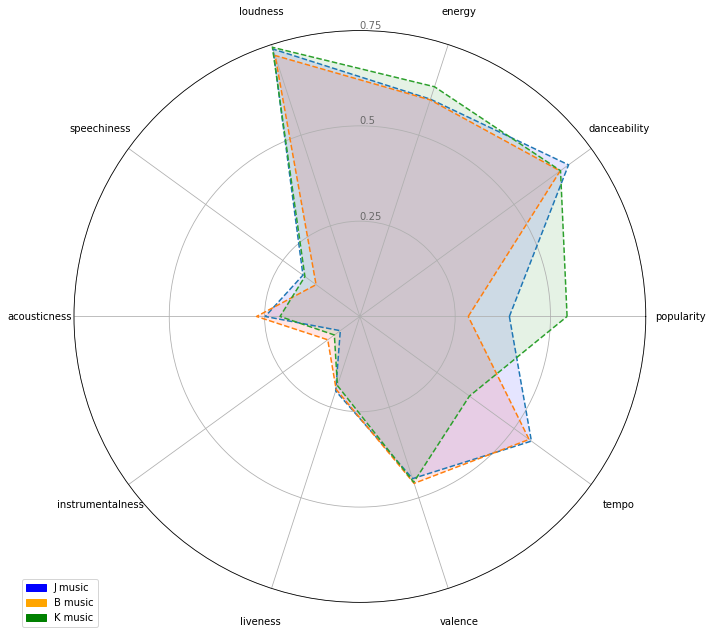

In [36]:
# --------- Create background for spider plot

# create an object that stores the number of variables we are visualizing
N = len(params)

# What will be the angle of each axis in the plot? (we divide the plot / number of variable)
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]

# Initialise the spider plot
ax = plt.subplot(111, polar=True)
#plt.rcParams['figure.facecolor'] = 'white'

ax.set_facecolor("white")

# If you want the first axis to be on top:
#ax.set_theta_offset(pi / 2)
#ax.set_theta_direction(-1)



# Draw one axe per variable + add labels
plt.xticks(angles[:-1], params, color='black', size=10)

# Draw ylabels
ax.set_rlabel_position(90)
plt.yticks([0.25,0.50,0.75], ["0.25","0.5","0.75"], color="dimgray", size=10)
plt.ylim(0,0.75)



# ------- Add each individual plot

#-- J's plot

# We are going to plot the first line of the data frame.
# But we need to repeat the first value to close the circular graph:
values= list(means_j.values)
values += values[:1] # appends the first value to the end of the list 
 
#Plot data
ax.plot(angles, values, linewidth=1.5, linestyle='dashed', label = "J")
# Fill area
ax.fill(angles, values, 'blue', alpha=0.1)


#-- B's Plot 
values = list(means_b.values)
values += values[:1] # append the first value to the list to close the loop
#Plot data
ax.plot(angles, values, linewidth=1.5, linestyle='dashed', label = "B")
# Fill area
ax.fill(angles, values, 'red', alpha=0.1)

#-- K's Plot 
values = list(means_k.values)
values += values[:1] # append the first value to the list to close the loop
#Plot data
ax.plot(angles, values, linewidth=1.5, linestyle='dashed', label = "K")
# Fill area
ax.fill(angles, values, 'green', alpha=0.1)

# Add legend
blue_patch = mpatches.Patch(color='blue', label='J music')
red_patch = mpatches.Patch(color='orange', label = 'B music')
green_patch = mpatches.Patch(color = 'green', label = "K music")
plt.legend(loc = "upper right",
           handles=[blue_patch, red_patch, green_patch], bbox_to_anchor=(0.05, 0.05))

# buffer for axis labels
ax.tick_params(pad=24)

# adjust size of plot
plt.tight_layout()
plt.rcParams["figure.figsize"] = (10,15)
# save the radar plot
plt.savefig("./radar_chart_BvJvK", dpi = 200)

# Show the graph
#plt.show()
